In [42]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import tools

In [7]:
fits_image_filename = 'COSMOS2020/COSMOS2020_FARMER_R1_v2.2_p3.fits'
table = fits.open(fits_image_filename)

In [48]:
df = pd.DataFrame(table[1].data)

,ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,1,150.477592,2.328928,14051.033584,24912.034028,0.019432,1.154464e-02,150.477638,2.328963,181_32,...,-9.140639,-9.116661,-9.089199,-9.063887,-9.050062,0.038461,0.038461,0.038461,0.038461,0.038461
1,2,150.477978,2.329170,14041.782916,24917.839703,0.102373,1.305541e-01,150.477974,2.329169,181_33,...,-8.737532,-8.618159,-8.478306,-8.337237,-8.213281,0.018737,0.018737,0.018737,0.018737,0.018737
2,3,150.477024,2.329483,NaN,NaN,NaN,NaN,150.477111,2.329667,181_34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,150.477312,2.330573,14057.758498,24951.520772,0.098902,9.468231e-02,150.477316,2.330574,181_38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,150.474793,2.332136,14118.162336,24989.006449,0.017773,3.539389e-02,150.474843,2.332179,181_39,...,-7.940726,-7.940726,-7.940726,-7.940726,-7.940726,0.042471,0.042471,0.042471,0.042471,0.042471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964501,964502,150.068793,2.870516,23853.815263,37909.784856,0.000065,8.288924e-05,150.068801,2.870500,283_5270,...,-9.524284,-9.095250,-8.751433,-8.005345,-8.005345,1.873661,1.873661,1.873661,1.873661,1.873661
964502,964503,150.072295,2.871735,23769.881726,37939.037182,0.000001,4.420735e-06,150.072305,2.871736,283_5271,...,-7.940726,-7.940726,-7.940726,-7.940726,-7.940726,1.129562,1.232992,1.334211,1.445236,1.543489
964503,964504,150.071539,2.874151,23787.988894,37997.043844,0.000004,6.963900e-07,150.071549,2.874164,283_5272,...,-10.023261,-9.878627,-9.719501,-9.560150,-9.434907,0.769145,0.817205,0.953520,1.319708,1.572936
964504,964505,150.088646,2.876782,23377.925486,38060.183349,0.098302,2.854818e-02,150.088643,2.876837,283_5273,...,-9.503490,-9.411257,-9.333571,-9.192708,-9.077335,0.042147,0.042147,0.042147,0.042147,0.042147


In [43]:
def find_column_names(dataframe, suffix):

    column_names = list(dataframe.columns.values)
    bands = ['HSC_g', 'HSC_r', 'HSC_i', 'HSC_z', 'HSC_y', 'CFHT_u']

    useful_column_names = []
    for name in column_names:
        for band in bands:
            if band+suffix == name:
                useful_column_names.append(name)

    return useful_column_names

magnitude_columns = find_column_names(df, '_MAG')
magnitudes_df = df[magnitude_columns]
magnitudes_df = magnitudes_df.dropna(axis=0, how='any')
magnitudes_df

,CFHT_u_MAG,HSC_g_MAG,HSC_r_MAG,HSC_i_MAG,HSC_z_MAG,HSC_y_MAG
0,26.089124,26.002327,25.887478,25.977980,25.866000,25.569493
1,27.732587,27.373473,26.937684,26.950075,26.912176,27.260498
3,28.000461,27.752870,27.446635,26.724170,26.403476,26.394767
4,26.614236,25.923896,25.797231,25.991617,26.037859,26.144087
5,27.835780,28.088120,27.633024,27.650674,27.522494,27.020269
...,...,...,...,...,...,...
964499,29.567954,29.389434,28.838939,28.083706,27.160296,27.605718
964501,30.104898,28.962861,28.620240,27.685320,27.524006,27.143287
964502,27.181792,26.504258,26.320006,26.215633,26.338627,26.184808
964503,27.274211,26.920058,26.527749,26.461833,26.320363,26.293990


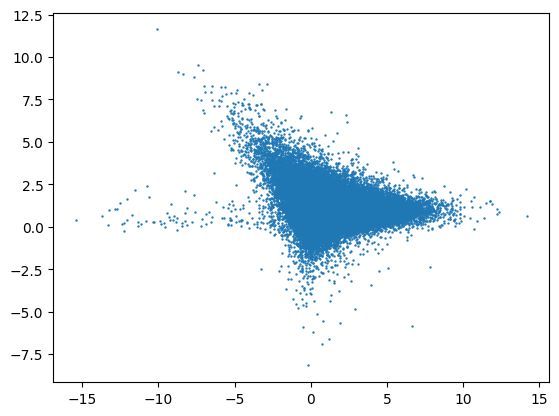

In [47]:
photometry = np.array(magnitudes_df)
colours = tools.calculate_colours(photometry)
umg = colours[:, 0]
gmr = colours[:, 1]
plt.scatter(umg, gmr, s=0.5)

(array([7.8697e+04, 6.8934e+04, 5.3260e+04, 5.6729e+04, 6.3812e+04,
        4.8545e+04, 4.6577e+04, 3.8111e+04, 2.7275e+04, 3.2344e+04,
        2.1548e+04, 1.9853e+04, 2.2568e+04, 1.7684e+04, 1.6246e+04,
        1.5090e+04, 1.2525e+04, 1.2510e+04, 1.0400e+04, 1.0939e+04,
        8.4370e+03, 6.9000e+03, 5.2200e+03, 5.4240e+03, 5.1630e+03,
        3.6070e+03, 2.3240e+03, 1.3650e+03, 9.3700e+02, 1.0120e+03,
        8.0000e+02, 4.2500e+02, 2.1500e+02, 2.4900e+02, 3.7500e+02,
        3.7600e+02, 2.4800e+02, 1.6700e+02, 9.1000e+01, 1.1100e+02,
        1.0900e+02, 1.4100e+02, 1.1400e+02, 1.0700e+02, 1.5300e+02,
        1.7700e+02, 1.7600e+02, 9.4000e+01, 7.6000e+01, 7.1000e+01]),
 array([0.     , 0.19985, 0.3997 , 0.59955, 0.7994 , 0.99925, 1.1991 ,
        1.39895, 1.5988 , 1.79865, 1.9985 , 2.19835, 2.3982 , 2.59805,
        2.7979 , 2.99775, 3.1976 , 3.39745, 3.5973 , 3.79715, 3.997  ,
        4.19685, 4.3967 , 4.59655, 4.7964 , 4.99625, 5.1961 , 5.39595,
        5.5958 , 5.79565, 5.9955 ,

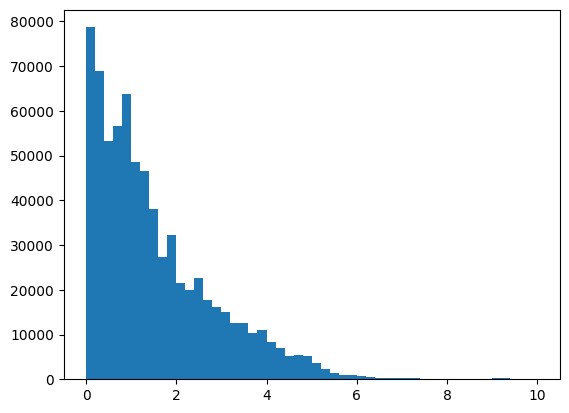

In [53]:
plt.hist(df['lp_zBEST'].dropna(), bins=50)